### Dataset Description

#### Datatset
- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Context
- Cardiovascular disease (CVDs) is the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.  
- This dataset contains 11 features that can be used to predict possible heart disease.

#### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


### Libraries

In [58]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Modelling
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from xgboost import cv

# Tree Visualisation
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Import Data

In [21]:
data = r'C:\Users\katdovzh\Desktop\projects\data-science\models\heart_disease_dataset.csv'

In [34]:
df = pd.read_csv(data)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Preprocessing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
label_encoder = LabelEncoder()

# label encoding sex
df['Sex'] = df['Sex'].replace(['M','F'],['0','1'])

df['Sex'] = label_encoder.fit_transform(df['Sex'])

# label encoding exercise Angina
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N','Y'],['0','1'])

df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])

In [35]:
hd_variables = ['ChestPainType',
'RestingECG',
'ST_Slope'
]

In [36]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
df = pd.get_dummies(data = df,
                         prefix = hd_variables,
                         columns = hd_variables)

In [30]:
features = [x for x in df.columns if x not in 'HeartDisease']
# Define input and target variable
X = df[features]
y = df.HeartDisease

# Splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state=42)

### Fitting and Evaluating the Model

In [54]:
# Define parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 3,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':300
        }
                        
# Instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
# Make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [56]:
# Check accuracy score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9500


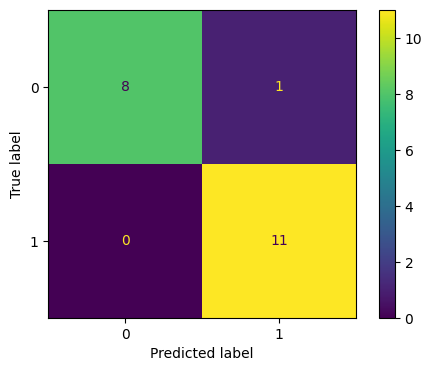

In [62]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

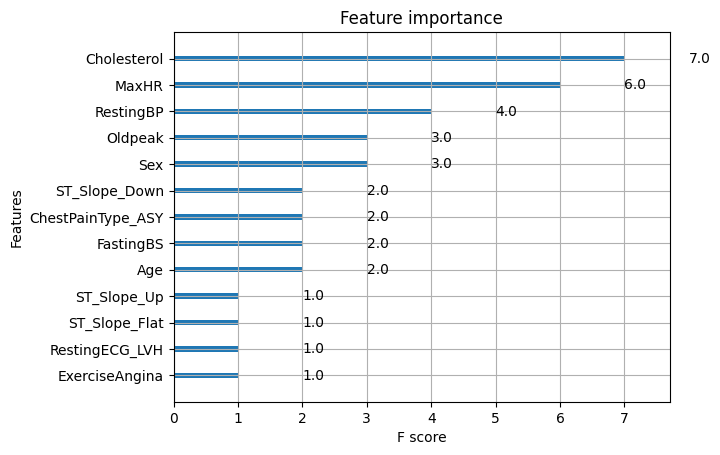

In [61]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

## Model Details

- **Algorithm Used**: XGBClassifier
- **[Algotithm Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)**
- **Features Used**: Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope
- **Target Variable**: Heart Disease classification (0: No Heart Disease, 1: Heart Disease Present)
- **Performance Metrics**:
  - **Accuracy**: 0.95

## Conclusion

- This project focused on implementing XGBoost Classifier model to predict Heart Disease. The model showcased robust performance, highlighted by an impressive accuracy score of 0.9500. 
- Cholesterol, MaxHR features exhibited the most significant impact on constructing the model.
- The examination of the confusion matrix emphasized the model's good performance, affirming its effectiveness in classifying heart disease instances. 
